# Importing Libraries

In [31]:
# Installing PyDrive
!pip install PyDrive
import os

import numpy as np

import itertools

from keras import models
from keras import layers
from keras import optimizers
from keras.models import load_model
from keras.applications import InceptionResNetV2
from keras.preprocessing.image import ImageDataGenerator

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

from matplotlib.pyplot import imshow
%matplotlib inline

# Defining Functions



In [0]:
def authent_use():
  # Authenticating user
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
  return drive

def donwload_to_colab(filename):
  # Verify list of google drive's IDs
  file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
  for file1 in file_list:
    if file1['title'] == filename:
      ID = file1['id']
     
  # Searching the dataset in google drive
  fileId = drive.CreateFile({'id': ID})
  print(fileId['title'])
  fileId.GetContentFile(filename)
  
def upload_to_drive(filename, folder_id):
  file = drive.CreateFile({'file':[{u'id': folder_id}]})
  file.SetContentFile(filename)
  file.Upload()
  
def calc_score(prediction, generator, name):
  pred_class = np.argmax(prediction, axis=1)
  label_class = generator.classes
  f1 = f1_score(pred_class, label_class, average='weighted')
  acc_norm = accuracy_score(pred_class, label_class) 
  print('# %s'%name)
  print('F1 score: %f'%f1)
  print('Normalized score: %f\n'%acc_norm)
  
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

# Definitions

In [0]:
load_model = True
download_dataset = False

# Download Dataset

In [3]:
!wget http://www.recod.ic.unicamp.br/~feandalo/MO444_dogs.tar.gz

--2018-05-24 22:58:49--  http://www.recod.ic.unicamp.br/~feandalo/MO444_dogs.tar.gz
Resolving www.recod.ic.unicamp.br (www.recod.ic.unicamp.br)... 143.106.7.151
Connecting to www.recod.ic.unicamp.br (www.recod.ic.unicamp.br)|143.106.7.151|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1260424819 (1.2G) [application/x-gzip]
Saving to: ‘MO444_dogs.tar.gz’

MO444_dogs.tar.gz    84%[===============>    ]   1010M  24.2MB/s    eta 10s    

MO444_dogs.tar.gz   100%[===================>]   1.17G  24.3MB/s    in 57s     

2018-05-24 22:59:46 (21.1 MB/s) - ‘MO444_dogs.tar.gz’ saved [1260424819/1260424819]



In [0]:
# Extracting file
!apt-get install p7zip-full
!7z e MO444_dogs.tar.gz
!tar -xvf MO444_dogs.tar

# Importing Dataset From Google Drive

In [0]:
# Authenticating user
drive = authent_use()

In [5]:
# Download file to google colab from google drive
donwload_to_colab('dogbreed.zip')
donwload_to_colab('MO444_dogs_test.txt')

dogbreed.zip
MO444_dogs_test.txt


In [0]:
%%capture
# Unzipping the dataset
!unzip dogbreed.zip

# Download Convolution Network

In [0]:
incept_v2 = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

In [7]:
#%%capture
# Freeze the layers except the last 4 layers
for layer in incept_v2.layers[:-4]:
    layer.trainable = False
    
# Check the trainable status of the individual layers
for layer in incept_v2.layers:
    print(layer, layer.trainable)

<keras.engine.topology.InputLayer object at 0x7f21f367c320> False
<keras.layers.convolutional.Conv2D object at 0x7f21f367ca20> False
<keras.layers.normalization.BatchNormalization object at 0x7f21f372d6d8> False
<keras.layers.core.Activation object at 0x7f21f372dda0> False
<keras.layers.convolutional.Conv2D object at 0x7f22546a7a90> False
<keras.layers.normalization.BatchNormalization object at 0x7f21f367c940> False
<keras.layers.core.Activation object at 0x7f21f363a978> False
<keras.layers.convolutional.Conv2D object at 0x7f21eddbdc88> False
<keras.layers.normalization.BatchNormalization object at 0x7f21edd95978> False
<keras.layers.core.Activation object at 0x7f21edd62a20> False
<keras.layers.pooling.MaxPooling2D object at 0x7f21edd0d470> False
<keras.layers.convolutional.Conv2D object at 0x7f21edd1e2e8> False
<keras.layers.normalization.BatchNormalization object at 0x7f21f371d400> False
<keras.layers.core.Activation object at 0x7f21f367cf60> False
<keras.layers.convolutional.Conv2D 

 False
<keras.layers.core.Activation object at 0x7f21e28c6f60> False
<keras.layers.merge.Concatenate object at 0x7f21e2829748> False
<keras.layers.convolutional.Conv2D object at 0x7f21e2870400> False
<keras.layers.core.Lambda object at 0x7f21e27e65c0> True
<keras.layers.convolutional.Conv2D object at 0x7f21e2824b70> True
<keras.layers.normalization.BatchNormalization object at 0x7f21e2824dd8> True
<keras.layers.core.Activation object at 0x7f21e27817b8> True


# Modifiying Model

In [8]:
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(incept_v2)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(83, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 8, 8, 1536)        54336736  
_________________________________________________________________
flatten_1 (Flatten)          (None, 98304)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              100664320 
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 83)                85075     
Total para

# Generating Validation and Training Set

In [13]:
train_dir = 'MO444_dogs/train/'
validation_dir = 'MO444_dogs/val/'
test_dir = 'MO444_dogs/test/'

image_size = (299, 299)

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)
 

train_batchsize = 10
val_batchsize = 10
test_batchsize = 10
 
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=image_size,
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=image_size,
        batch_size=test_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 8300 images belonging to 83 classes.
Found 6022 images belonging to 83 classes.
Found 5420 images belonging to 83 classes.


# Generate model

In [14]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
nb_epochs = 5
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=nb_epochs,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/5


ValueError: ignored

In [0]:
# Save the model
model_name = 'cnn_model_waug.h5'
model.save(model_name)

In [0]:
# Upload to drive
model_ID = '12345'
upload_to_drive(model_name, model_ID)

# Load model

In [8]:
# Download file to google colab from google drive
model_name = 'cnn_model.h5'
donwload_to_colab(model_name)

cnn_model.h5


In [0]:
# Searching the dataset in google drive
model = load_model(model_name)

# Predictions

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=train_batchsize,
        class_mode='categorical',
        shuffle=False)

prediction_train = model.predict_generator(train_generator,steps=train_generator.samples/train_generator.batch_size,verbose=1)

prediction_validation = model.predict_generator(validation_generator, 
                                         steps=validation_generator.samples/validation_generator.batch_size,verbose=1)

prediction_test = model.predict_generator(test_generator, 
                                         steps=test_generator.samples/test_generator.batch_size,verbose=1)

Found 8300 images belonging to 83 classes.
138/602 [=====>........................] - ETA: 2:53

542/542 [==============================] - 203s 374ms/step


In [12]:
print('Results of Prediction!\n')
calc_score(prediction_train, train_generator,'Train')
calc_score(prediction_validation, validation_generator, 'Validation')
calc_score(prediction_test, test_generator, 'Test')

Results of Prediction!

# Train
F1 score: 0.928117
Normalized score: 0.927831

# Validation
F1 score: 0.925231
Normalized score: 0.924942

# Test
F1 score: 0.941098
Normalized score: 0.938561



Confusion matrix, without normalization
[[ 98   0   0 ...   0   0   0]
 [  0 100   0 ...   0   0   0]
 [  0   0  96 ...   0   0   0]
 ...
 [  0   0   0 ...  94   0   0]
 [  0   0   0 ...   0  97   0]
 [  0   0   0 ...   0   0  94]]


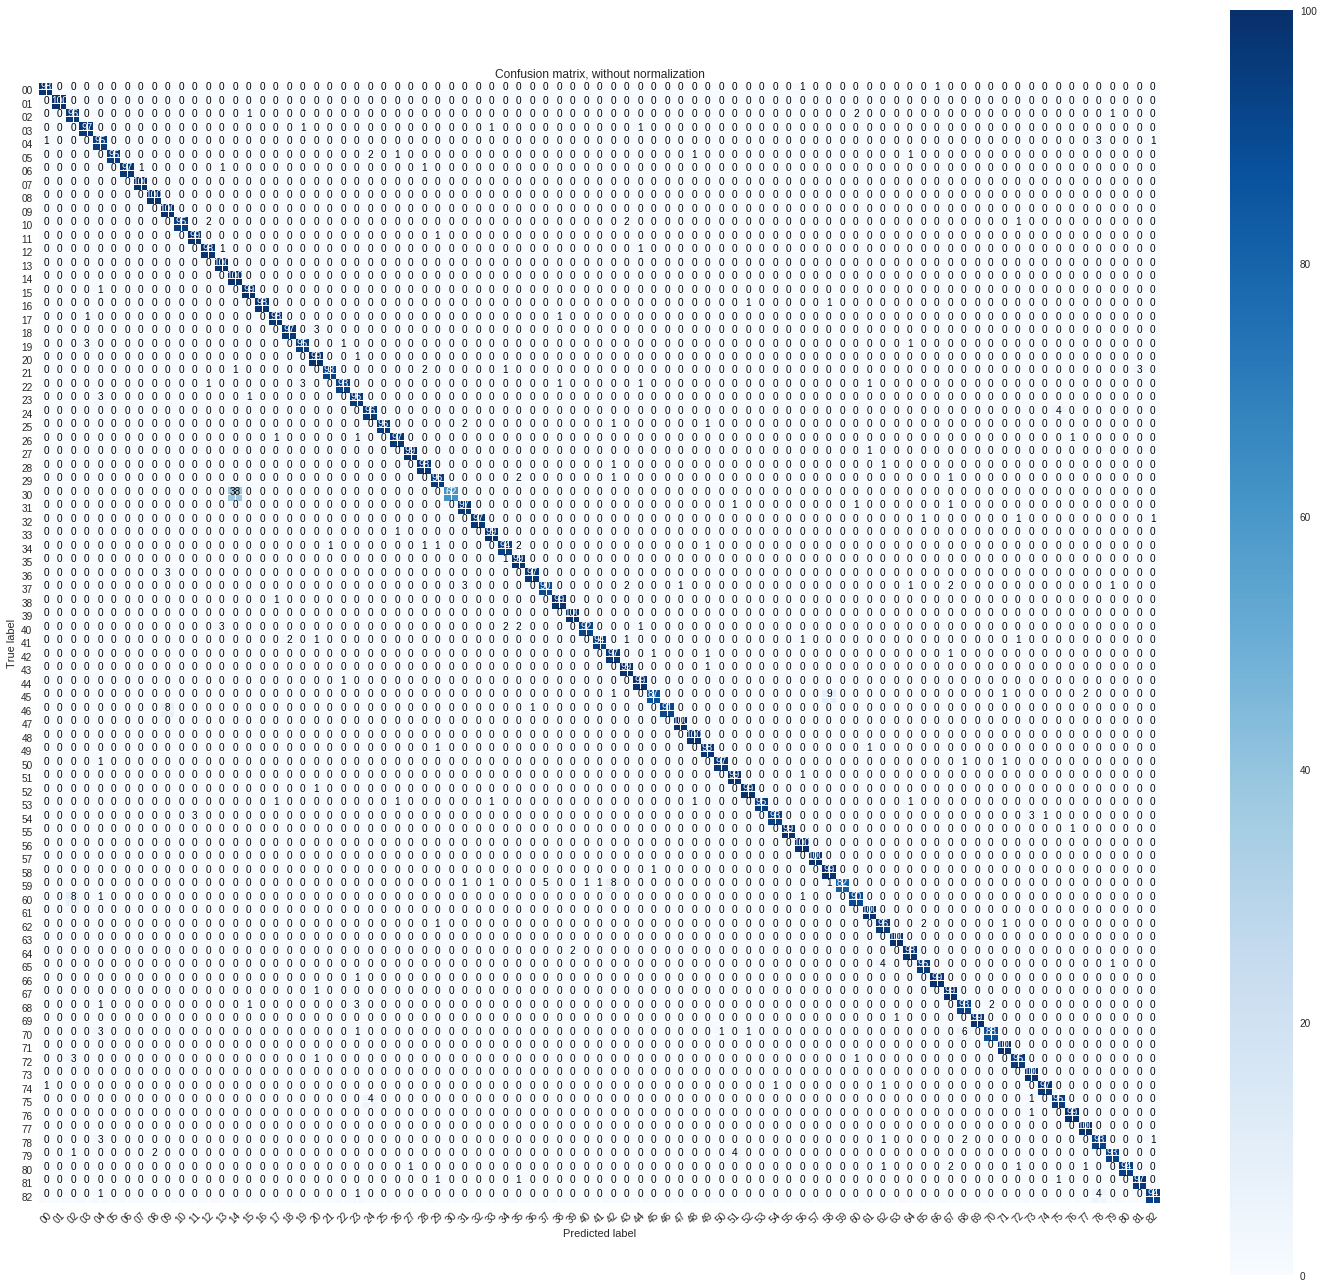

In [36]:
pred_class = np.argmax(prediction_train, axis=1)
label_class = train_generator.classes

# Compute confusion matrix
cnf_matrix = confusion_matrix(label_class, pred_class)
np.set_printoptions(precision=2)

class_names = []

for i in range(83):
  if i < 10:
    class_names.append('0'+str(i))
  else:
    class_names.append(str(i))

# Plot non-normalized confusion matrix
plt.figure(figsize=(20, 18))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

es.jpg
65


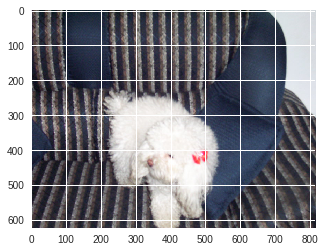

In [37]:
from PIL import Image

# Download file to google colab from google drive
image = 'es.jpg'
donwload_to_colab(image)

# Searching the dataset in google drive
image_new = img = Image.open('es.jpg')
imshow(img)


img = img.resize((image_size[0],image_size[1]))
arr = np.array(img)
arr = arr.reshape((image_size[0],image_size[1],3))
arr = np.expand_dims(arr, axis=0)  
arr = arr/255.0

prediction = model.predict(arr)[0]
print(np.argmax(prediction, axis=0))

In [14]:
from PIL import Image
from pathlib import Path

input_path = Path('MO444_dogs/')

train_path = input_path / 'train'
val_path = input_path / 'val'

dog_train = os.listdir(train_path) 
dog_val = os.listdir(val_path)


number = np.arange(120)

for n in number:
  if n < 10:
    img = Image.open('MO444_dogs/train/80/80_000'+str(n)+'.jpg')
  else:
    Image.open('MO444_dogs/train/80/80_00'+str(n)+'.jpg')

  img = img.resize((image_size[0],image_size[1]))
  arr = np.array(img)
  arr = arr.reshape((image_size[0],image_size[1],3))
  arr = np.expand_dims(arr, axis=0)  
  arr = arr/255.0

  prediction = model.predict(arr)[0]

  bestclass = ''
  bestconf = -1
  for n in range(83):
    if (prediction[n] > bestconf):
      bestclass = str(n)
      bestconf = prediction[n]
  print('I think this digit is a ' + bestclass + ' with ' + str(bestconf * 100) + '% confidence.')

I think this digit is a 80 with 55.75721263885498% confidence.
I think this digit is a 80 with 99.9998927116394% confidence.
I think this digit is a 80 with 99.99922513961792% confidence.
I think this digit is a 80 with 100.0% confidence.
I think this digit is a 80 with 100.0% confidence.
I think this digit is a 80 with 100.0% confidence.
I think this digit is a 80 with 99.99997615814209% confidence.
I think this digit is a 72 with 98.35844039916992% confidence.
I think this digit is a 80 with 100.0% confidence.
I think this digit is a 80 with 100.0% confidence.
I think this digit is a 80 with 100.0% confidence.
I think this digit is a 80 with 100.0% confidence.
I think this digit is a 80 with 100.0% confidence.
I think this digit is a 80 with 100.0% confidence.
I think this digit is a 80 with 100.0% confidence.
I think this digit is a 80 with 100.0% confidence.
I think this digit is a 80 with 100.0% confidence.
I think this digit is a 80 with 100.0% confidence.
I think this digit is a

I think this digit is a 80 with 100.0% confidence.
I think this digit is a 80 with 100.0% confidence.
I think this digit is a 80 with 100.0% confidence.
I think this digit is a 80 with 100.0% confidence.
I think this digit is a 80 with 100.0% confidence.
I think this digit is a 80 with 100.0% confidence.
I think this digit is a 80 with 100.0% confidence.
I think this digit is a 80 with 100.0% confidence.
I think this digit is a 80 with 100.0% confidence.
I think this digit is a 80 with 100.0% confidence.


FileNotFoundError: ignored

# Reseting notebook

In [0]:
# Reset notebook
!kill -9 -1

# Tests

In [0]:
class TensorBoardWrapper(TensorBoard):
    '''Sets the self.validation_data property for use with TensorBoard callback.'''

    def __init__(self, batch_gen, nb_steps, **kwargs):
        super().__init__(**kwargs)
        self.batch_gen = batch_gen # The generator.
        self.nb_steps = nb_steps     # Number of times to call next() on the generator.

    def on_epoch_end(self, epoch, logs):
        # Fill in the `validation_data` property. Obviously this is specific to how your generator works.
        # Below is an example that yields images and classification tags.
        # After it's filled in, the regular on_epoch_end method has access to the validation_data.
        imgs, tags = None, None
        for s in range(self.nb_steps):
            ib, tb = next(self.batch_gen)
            if imgs is None and tags is None:
                imgs = np.zeros((self.nb_steps * ib.shape[0], *ib.shape[1:]), dtype=np.float32)
                tags = np.zeros((self.nb_steps * tb.shape[0], *tb.shape[1:]), dtype=np.uint8)
            imgs[s * ib.shape[0]:(s + 1) * ib.shape[0]] = ib
            tags[s * tb.shape[0]:(s + 1) * tb.shape[0]] = tb
        self.validation_data = [imgs, tags, np.ones(imgs.shape[0]), 0.0]
        return super().on_epoch_end(epoch, logs)


from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
class Metrics(Callback):
  def on_train_begin(self, logs={}):
   self.val_f1s = []
   self.val_recalls = []
   self.val_precisions = []

  def on_epoch_end(self, epoch, logs={}):
   val_predict = (np.asarray(self.model.predict(self.model.validation_data[0]))).round()
   val_targ = self.model.validation_data[1]
   _val_f1 = f1_score(val_targ, val_predict)
   _val_recall = recall_score(val_targ, val_predict)
   _val_precision = precision_score(val_targ, val_predict)
   self.val_f1s.append(_val_f1)
   self.val_recalls.append(_val_recall)
   self.val_precisions.append(_val_precision)
   print('— val_f1: %f — val_precision: %f — val_recall %f'%(_val_f1, _val_precision, _val_recall))
   return
 
metrics = Metrics()

########################

# Verifing one example of the dataset
from IPython.display import Image
Image('MO444_dogs/train/54/54_0000.jpg')

########################

i = 0

for i in range(len(pred_class)):
  if pred_class[i] != ground_truth[i]:
    i+=1
print(i)